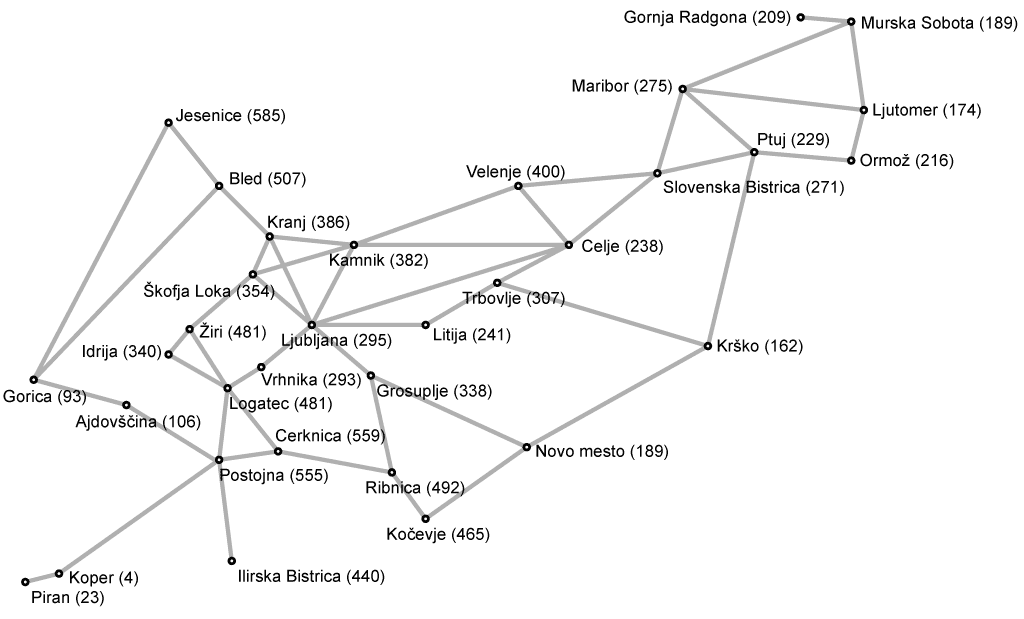

In [1]:
visine = {'Piran': 23, 'Koper': 4, 'Ilirska Bistrica': 440, 'Postojna': 555, 'Gorica': 93,
          'Ajdovščina': 106, 'Idrija': 340, 'Logatec': 481, 'Cerknica': 559, 'Vrhnika': 293,
          'Žiri': 481, 'Ljubljana': 295, 'Ribnica': 492, 'Kočevje': 465, 'Grosuplje': 338,
          'Litija': 241, 'Kranj': 386, 'Kamnik': 382, 'Škofja Loka': 354, 'Trbovlje': 307,
          'Novo mesto': 189, 'Krško': 162, 'Celje': 238, 'Maribor': 275, 'Velenje': 400,
          'Slovenska Bistrica': 271, 'Murska Sobota': 189, 'Ptuj': 229, 'Ormož': 216,
          'Ljutomer': 174, 'Gornja Radgona': 209, 'Bled': 507, 'Jesenice': 585}

povezave = [("Piran", "Koper"),
            ("Koper", "Postojna"),
            ("Ilirska Bistrica", "Postojna"),
            ("Postojna", "Logatec"), ("Postojna", "Cerknica"),
            ("Gorica", "Ajdovščina"), ("Gorica", "Bled"), ("Gorica", "Jesenice"),
            ("Ajdovščina", "Postojna"),
            ("Idrija", "Logatec"), ("Idrija", "Žiri"),
            ("Logatec", "Žiri"), ("Logatec", "Vrhnika"), ("Logatec", "Cerknica"),
            ("Cerknica", "Ribnica"),
            ("Vrhnika", "Ljubljana"),
            ("Žiri", "Škofja Loka"),
            ("Ljubljana", "Škofja Loka"), ("Ljubljana", "Kamnik"),
            ("Ljubljana", "Celje"), ("Ljubljana", "Litija"),
            ("Ljubljana", "Grosuplje"), ("Ljubljana", "Kranj"),
            ("Ribnica", "Grosuplje"), ("Ribnica", "Kočevje"),
            ("Kočevje", "Novo mesto"),
            ("Grosuplje", "Novo mesto"),
            ("Litija", "Trbovlje"),
            ("Kranj", "Bled"), ("Kranj", "Škofja Loka"), ("Kranj", "Kamnik"),
            ("Kamnik", "Velenje"), ("Kamnik", "Celje"), ("Kamnik", "Škofja Loka"),
            ("Trbovlje", "Celje"), ("Trbovlje", "Krško"),
            ("Novo mesto", "Krško"),
            ("Krško", "Ptuj"),
            ("Celje", "Velenje"), ("Celje", "Slovenska Bistrica"),
            ("Maribor", "Slovenska Bistrica"), ("Maribor", "Ptuj"),
            ("Maribor", "Murska Sobota"), ("Maribor", "Ljutomer"),
            ("Velenje", "Slovenska Bistrica"),
            ("Slovenska Bistrica", "Ptuj"),
            ("Murska Sobota", "Gornja Radgona"), ("Murska Sobota", "Ljutomer"),
            ("Ptuj", "Ormož"),
            ("Ljutomer", "Ormož"),
            ("Bled", "Jesenice")]

## 1. Ogrožena mesta
Napiši funkcijo `ogrozena(povezave)`, ki vrne množico ogroženih mest, ki so povezana z enim samim mestom. Za primer z zemljevida vrne `{"Piran", "Ilirska Bistrica", "Gornja Radgona"}`. Ker bomo v zemljevid morda vključili vsa slovenska naselja, mora funkcija delovati tudi, če krajev zelo veliko.

### Rešitev

Ker naloge grozi, da bo naselij morda veliko, s čimer bo veliko tudi povezav, funkcije ne smemo sprogramirati tako, da gre za vsako naselje posebej čez seznam povezav. Čez seznam gremo le enkrat in za vsak kraj, ki ga srečamo, prištejemo po eno povezavo. Nato vrnemo množico tistih, pri katerih smo našteli le eno povezavo.

In [2]:
from collections import defaultdict

def ogrozena(povezave):
    sosedi = defaultdict(int)
    for kraj1, kraj2 in povezave:
        sosedi[kraj1] += 1
        sosedi[kraj2] += 1

    return {kraj for kraj, n in sosedi.items() if n == 1}

In [3]:
ogrozena(povezave)

{'Gornja Radgona', 'Ilirska Bistrica', 'Piran'}

Na koncu smo vrnili izpeljano množico. Ako bi tega ne znali, bi naredili pač po daljši poti:

```python
    osamelci = set()
    for kraj, n in sosedi.items():
        if n == 1:
            osamelci.add(kraj)
```

Lahko pa naredimo malo drugače. Pripravimo si funkcijo, ki prejme seznam krajev in vrne slovar, katerega ključi so kraji, vrednosti pa množice njihovih sosedov. Takšna funkcija nam namreč lahko pride prav tudi pri naslednjih nalogah. V funkciji `ogrozena` potem le pokličemo to funkcijo in naberemo kraje, ki imajo le enega soseda.

In [4]:
def sosedi(povezave):
    sosedi = defaultdict(set)
    for kraj1, kraj2 in povezave:
        sosedi[kraj1].add(kraj2)
        sosedi[kraj2].add(kraj1)
    return sosedi

def ogrozena(povezave):
    return {kraj for kraj, soss in sosedi(povezave).items() if len(soss) == 1}

## 2. Možna pot

Ker je gravitacija na Marsu nižja, ugibamo, da marsovska pehota ne bo mogla iz kraja z nižjo v kraj z višjo nadmorsko višino. Iz Cerknice lahko gredo na morje (Cerknica – Postojna – Koper), ne pa na Ptuj, ker ne obstaja pot iz Cerknice do Ptuja, na kateri se ne bi nekje povzpeli. (Vmesne klance zanemarimo; med Postojno in Koprom se tudi dvignemo, a na zemljevidu tega ni.)

Napiši funkcijo `mozna_pot(odkod, kam, povezave, visine)`, ki vrne `True`, če obstaja nenaraščajoča pot odkod kam in `False`, če je ni.

### Rešitev

To nalogo je preprosto rešiti rekurzivno. Pod `odkod` `kam` obstaja, če gre za isti kraj ali pa je `odkod` povezan z nekim krajem, ki leži nižje in od koder obstaja pot `kam`.

In [5]:
def mozna_pot(odkod, kam, povezave, visine):
    if odkod == kam:
        return True
    for kraj1, kraj2 in povezave:
        if kraj1 == odkod and visine[kraj2] < visine[odkod] and mozna_pot(kraj2, kam, povezave, visine):
            return True
        if kraj2 == odkod and visine[kraj1] < visine[odkod] and mozna_pot(kraj1, kam, povezave, visine):
            return True
    return False

In [6]:
mozna_pot("Cerknica", "Koper", povezave, visine)

True

In [7]:
mozna_pot("Cerknica", "Ptuj", povezave, visine)

False

Zoprno je, da je potrebno pregledovati povezave v obe smeri. To smo naredili z ločenima `if`-oma; lahko bi ju združili v enega in vmes dali `or`. Posebne koristi ne bi bilo; morda je tako, kot je, celo pregledneje.

Če nam za preglednost ni toliko mar, pa lahko zložimo vse skupaj v eno vrstico.

In [8]:
def mozna_pot(odkod, kam, povezave, visine):
    return odkod == kam or any(
        kraj1 == odkod and visine[kraj2] < visine[odkod] and mozna_pot(kraj2, kam, povezave, visine)
        or kraj2 == odkod and visine[kraj1] < visine[odkod] and mozna_pot(kraj1, kam, povezave, visine)
        for kraj1, kraj2 in povezave)

Obe rešitvi sta dokaj počasni, saj za vsako povezavo pregledata ves seznam povezav. Če bi bil zemljevid večji ... to ne bi bilo dobro. Tu nam lahko precej pomaga funkcija `sosedi`, ki smo jo napisali prejle. Lepše bi bilo, če bi `mozna_pot` dobila seznam sosedov. Če pa že dobi seznam povezav, napišimo drugo rekurzivno funkcijo, `mozna_pot0`, ki prejme sosede; `mozna_pot` bo potem poklicala to funkcijo.

In [9]:
def mozna_pot(odkod, kam, povezave, visine):
    return mozna_pot0(odkod, kam, sosedi(povezave), visine)

def mozna_pot0(odkod, kam, sosedi, visine):
    if odkod == kam:
        return True
    for sosed in sosedi[odkod]:
        if visine[sosed] < visine[odkod] and mozna_pot0(sosed, kam, sosedi, visine):
            return True
    return False

In [10]:
def mozna_pot(odkod, kam, povezave, visine):
    return mozna_pot0(odkod, kam, sosedi(povezave), visine)

def mozna_pot0(odkod, kam, sosedi, visine):
    return odkod == kam \
           or any(visine[sosed] < visine[odkod] and mozna_pot0(sosed, kam, sosedi, visine)
                  for sosed in sosedi[odkod])

Naloga je nekoliko podobna nalogi, v kateri smo preverjali, ali rodbina vsebuje določeno ime: "otroci" vsakega kraja so tisti kraji, ki so povezani z njim in ležijo nižje od njega. Razlika je sicer v tem, da ima vsak otrok lahko več staršev, a to ne bo motilo.

Nalogo lahko rešimo tudi brez rekurzije:

In [11]:
def mozna_pot(odkod, kam, povezave, visine):
    sosednji = sosedi(povezave)
    pregledati = [odkod]
    while pregledati:
        kraj = pregledati.pop()
        if kraj == kam:
            return True
        pregledati += (sosed for sosed in sosednji[kraj] if visine[sosed] < visine[kraj])
    return False

`pregledati` je seznam krajev, ki jih je potrebno pregledati. V vsakem koraku pregledamo en kraj. Če je to ciljni kraj, smo zmagali. Če ni, dodamo med kraje, ki jih je potrebno pregledati, vse sosede, ki so nižji od njega. Če zmanjka krajev, ki jih je potrebno pregledati, pot ne obstaja.

## 3. Zasede

Takoj, ko marsovska enota prehodi neko povezavo, postavimo nanjo zasedo, ki bo ustavila vse naslednje enote, ki bi hotele uporabiti isto pot. Zato lahko Marsovci vsako pot uporabijo le enkrat. Recimo, da pošljejo tri enote z načrti: 

In [12]:
poti = [["Postojna", "Logatec", "Idrija", "Bled", "Kranj"],
        ["Jesenice", "Bled", "Kranj", "Kamnik"],
        ["Celje", "Kamnik", "Kranj", "Ljubljana"]]

Enote gredo na pot ena za drugo, ne hkrati. Na cilj bo prišla le druga. Prva se ustavila v Idriji, ker ni povezave med Idrijo in Bledom, tretja pa v Kamniku, ker je povezavo Kamnik – Kranj (sicer v nasprotni smeri) uporabila že druga enota. Druga pride na cilj, ker, ne spreglej, sme iti po poti Bled – Kranj, ker prva ni šla po njej, saj se je ustavila v Idriji.

Predpostavka, da marsovci ne morejo hoditi navkreber, je bila optimistična, zato bomo v tej nalogi višine zanemarili.
Napiši funkcijo zasede(poti, povezave), ki dobi seznam poti v takšni obliki in vrne število enot, ki bodo prišle na cilj.

### Rešitev

Lahko delamo tako: gremo po poti (zaporedne kraje dobimo z `zip(pot, pot[1:])` in vsako uporabljeno povezavo pobrišemo iz seznama. (Da smemo to početi, moramo prej narediti kopijo seznama povezav!) Če se zgodi, da kakšne povezave ni (več), prekinemo zanko (`break`). Če se zanka ne prekine (`else` po zanki), povečamo število uspešnih poti.

In [13]:
def zasede(poti, povezave):
    povezave = povezave[:]
    uspesnih = 0
    for pot in poti:
        for odkod, kam in zip(pot, pot[1:]):
            if (odkod, kam) in povezave:
                povezave.remove((odkod, kam))
            elif (kam, odkod) in povezave:
                povezave.remove((kam, odkod))
            else:
                break
        else:
            uspesnih += 1
    return uspesnih

In [14]:
zasede(poti, povezave)

1

Druga možnost je, da si shranjujemo množico uporabljenih povezav. Ta bo delovala malo hitrejše, saj je brisanje iz seznama načelno počasno. Veliko boljše pa je takole:

In [15]:
def zasede(poti, povezave):
    povezave = set(povezave)
    uspesnih = 0
    for pot in poti:
        for odkod, kam in zip(pot, pot[1:]):
            if (odkod, kam) in povezave:
                povezave.remove((odkod, kam))
            elif (kam, odkod) in povezave:
                povezave.remove((kam, odkod))
            else:
                break
        else:
            uspesnih += 1
    return uspesnih

Sprememba je trivialna: `povezave = povezave[:]` smo zamenjali z `povezave = set(povezave)`. Namesto seznama povezav imam zdaj množico. Rezultat tega je, da bo tako preverjanje, ali povezava obstaja kot njeno odstranjevanje bistveno hitrejše, neodvisno od števila povezav.

## 4. Branje podatkov
Zemljevid je shranjen v datoteki. Ta vsebuje vrstice z imenom kraja, dvopičjem in nadmorsko višino. Sledi prazna vrstica, nato povezave: ime kraja, dvopičje in kraji, povezani z njim.

```txt
Ilirska Bistrica: 440
Postojna: 555
Nova Gorica: 93
Ribnica: 492
Logatec: 481
Cerknica: 559

Logatec: Cerknica
Cerknica: Ribnica Postojna
Postojna: Nova Gorica Logatec Ilirska Bistrica
```

Med povezanimi kraji ni ločil! (Spet ta Kozjančeva!) Pomaga nam dvoje: vsi kraji so našteti v slovarju višin in ime nobenega kraja se ne začne z besedami, ki so same celotno ime drugega kraja. Če obstaja Nova Gabrovka, potem gotovo ne obstaja Nova Gabrovka nad Colom (lahko pa obstaja Gabrovka).

Napiši funkcijo `zemljevid(ime_datoteke)`, ki vrne slovar višin in seznam povezav v oblikah, ki smo ju vajeni.

Če imaš težave, najprej napiši funkcijo, ki pravilno deluje za kraje, katerih ime je sestavljeno iz ene besede, pa bo tudi to štelo za nekaj. Nato ločeno napiši funkcijo, ki dela (ali vsaj poskuša delati) z večbesednimi imeni.

### Rešitev

In [16]:
def zemljevid(ime_datoteke):
    f = open(ime_datoteke)

    visine = {}
    for vrstica in f:
        if not vrstica.strip():
            break
        kraj, visina = vrstica.split(":")
        visine[kraj] = int(visina)

    povezave = []
    for vrstica in f:
        kraj, sosedi = vrstica.split(":")
        sosed = ""
        for beseda in sosedi.strip().split():
            sosed += beseda
            if sosed in visine:
                povezave.append((kraj, sosed))
                sosed = ""
            else:
                sosed += " "
    return visine, povezave

Branje datoteke bi moralo biti zdaj že kar trivialno.

Prazno vrstico prepoznamo po tem, da je takrat, ko jo odstripamo, ne ostane nič več. Tedaj se prva zanka prekine.

Druga je bolj zabavna. V niz `sosed` nabiramo besede (`sosed += beseda`), dokler soseda ne najdemo v seznamu višin. Če je tam, dodamo povezavo in začnemo znova (`sosed = ""`). Če ime kraja še ni dokončno, pa dodamo presledek, da bomo v naslednjem krogu zanke pripeli novo besedo.

## 5. Enota
Za sledenje marsovskim enotam napiši razred `Enota` z naslednjimi metodami.

- Konstruktor prejme kraj izkrcanja, povezave in višine.
- `premik(kam)`: če obstaja povezava iz trenutnega v podani kraj, premakne enoto in vrne `True`. Sicer vrne `False`.
- `pot()`: vrne seznam vseh krajev, v katerih se je nahajala enota.
- `vzpon()`: vrne vsoto vzponov; spuste zanemarimo.

### Rešitev

Najprej se moramo odločiti, kaj bodo shranjevali objekti. Očitno si moramo zapomniti povezave in višine. No, namesto povezav si bomo raje shranili seznam sosedov, saj je tako bolj praktično. Uporabili bom kar funkcijo, ki smo si jo pripravili na začetku izpita. Poleg tega mora shraniti vsaj še pot, ta bo v atributu z imenom `_pot`, da se njegovo ime ne bo teplo z imenom metode `pot`. Vsoto vzponov bi sicer lahko računali iz poti, vendar si shranjujmo še to, v atribut `_vzpon`.

Ko smo zmenjeni glede tega, so metode trivialne.

In [17]:
class Enota:
    def __init__(self, zacetek, povezave, visine):
        self.sosedi = sosedi(povezave)
        self.visine = visine
        self._pot = [zacetek]
        self._vzpon = 0

    def premik(self, kam):
        kraj = self._pot[-1]
        if kam not in self.sosedi[kraj]:
            return False
        self._pot.append(kam)
        self._vzpon += max(0, self.visine[kam] - self.visine[kraj])
        return True

    def pot(self):
        return self._pot

    def vzpon(self):
        return self._vzpon

Manjši trik je samo prištevanje k `vzpon_`: lahko bi napisali `if`, a smo leni in pokličemo `max`. Če je število negativno, bomo prišteli 0.